#### Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset Specifications

In [4]:
spotify_dataset = pd.read_csv("./spotify_data.csv")
spotify_dataset.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Anyone,Anyone,Justin Bieber,2021-01-01,190779,92,0.686,0.1810,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,1,Therefore I Am,Therefore I Am,Billie Eilish,2020-11-12,174321,93,0.889,0.2180,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,3,34+35,Positions,Ariana Grande,2020-10-30,173710,93,0.830,0.2370,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,89,0.336,0.1640,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4


In [5]:
print(spotify_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1750 non-null   int64  
 1   name              1750 non-null   object 
 2   album             1750 non-null   object 
 3   artist            1750 non-null   object 
 4   release_date      1750 non-null   object 
 5   length            1750 non-null   int64  
 6   popularity        1750 non-null   int64  
 7   danceability      1750 non-null   float64
 8   acousticness      1750 non-null   float64
 9   energy            1750 non-null   float64
 10  instrumentalness  1750 non-null   float64
 11  liveness          1750 non-null   float64
 12  loudness          1750 non-null   float64
 13  speechiness       1750 non-null   float64
 14  tempo             1750 non-null   float64
 15  time_signature    1750 non-null   int64  
dtypes: float64(8), int64(4), object(4)
memory 

In [6]:
print(spotify_dataset.describe())

        Unnamed: 0         length   popularity  danceability  acousticness  \
count  1750.000000    1750.000000  1750.000000   1750.000000   1750.000000   
mean    874.500000  195436.638286    69.506286      0.651688      0.298371   
std     505.325802   47465.014667    24.158489      0.175828      0.301546   
min       0.000000   34533.000000     0.000000      0.000000      0.000035   
25%     437.250000  167280.500000    68.000000      0.553250      0.051825   
50%     874.500000  193838.000000    77.000000      0.671000      0.183000   
75%    1311.750000  222346.000000    83.000000      0.779000      0.499000   
max    1749.000000  530253.000000   100.000000      0.980000      0.996000   

            energy  instrumentalness     liveness     loudness  speechiness  \
count  1750.000000       1750.000000  1750.000000  1750.000000  1750.000000   
mean      0.592553          0.053457     0.177332    -7.867144     0.118890   
std       0.205806          0.195213     0.129798     5.1903

In [7]:
# popularity rankings

pop_rank = spotify_dataset.sort_values(by='popularity', ascending=False)

In [8]:
# pop_rank = pop_rank.drop_duplicates(inplace=False)

In [9]:
spotify_dataset.duplicated().sort_index().value_counts()
# no duplicated rows

False    1750
Name: count, dtype: int64

#### Basic Analysis

In [32]:
spotify_dataset.iloc[:,1:5].sort_values(by='release_date')

,name,album,artist,release_date
453,Jingle Bell Rock,Jingle Bell Rock/Captain Santa Claus (And His ...,Bobby Helms,1957-12-02
577,Let It Snow! Let It Snow! Let It Snow!,A Winter Romance,Dean Martin,1959-01-01
437,Let It Snow! Let It Snow! Let It Snow!,A Winter Romance,Dean Martin,1959-01-01
933,The Christmas Song (Merry Christmas To You),The Christmas Song (Expanded Edition),Nat King Cole,1962
1368,The Christmas Song (Merry Christmas To You),The Christmas Song (Expanded Edition),Nat King Cole,1962
...,...,...,...,...
563,Love Yourself,2000s Love Songs,Various Artists,2021-01-25
1111,Cuando Tú Quieras,Perreo En Los Venas Vol. 5,Various Artists,2021-01-25
1592,"6 German Dances, K. 600: No. 1 in C Major",Start Your Day With Mozart,Wolfgang Amadeus Mozart,2021-01-26
1596,"6 German Dances, K. 600: No. 5 in G Major",Start Your Day With Mozart,Wolfgang Amadeus Mozart,2021-01-26


In [34]:
# query artist's songs
spotify_dataset.iloc[:,1:5].query('artist=="Wolfgang Amadeus Mozart"').sort_values(by='album', ascending=True)

,name,album,artist,release_date
1447,"3 German Dances, K. 605: No. 2 in G Major",Mozart for Brainpower,Wolfgang Amadeus Mozart,2021-01-19
1584,"6 German Dances, K. 600: No. 2 in F Major",Mozart for Brainpower,Wolfgang Amadeus Mozart,2021-01-19
1586,"6 German Dances, K. 600: No. 1 in C Major",Mozart for Brainpower,Wolfgang Amadeus Mozart,2021-01-19
1588,"6 German Dances, K. 600: No. 5 in G Major",Mozart for Brainpower,Wolfgang Amadeus Mozart,2021-01-19
1590,6 Minuets K. 105 (attribution doubtful): No. 6...,Mozart for Brainpower,Wolfgang Amadeus Mozart,2021-01-19
1592,"6 German Dances, K. 600: No. 1 in C Major",Start Your Day With Mozart,Wolfgang Amadeus Mozart,2021-01-26
1594,6 Minuets K. 105 (attribution doubtful): No. 6...,Start Your Day With Mozart,Wolfgang Amadeus Mozart,2021-01-26
1596,"6 German Dances, K. 600: No. 5 in G Major",Start Your Day With Mozart,Wolfgang Amadeus Mozart,2021-01-26
1448,"3 German Dances, K. 605: No. 3 in C Major, Tri...",Stay at Home with Mozart,Wolfgang Amadeus Mozart,2021-01-16
1627,"7 Menuets, K. 65a: No. 1 in G Major",Wolfgang Amadeus Mozart: Essential Orchestral ...,Wolfgang Amadeus Mozart,2021-01-22


[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=13, weights=distance; total time=   0.0s


In [12]:
spotify_dataset['album'].value_counts()

album
Dangerous: The Double Album             106
Shoot For The Stars Aim For The Moon     27
Goodbye & Good Riddance                  25
Legends Never Die                        23
Positions                                16
                                       ... 
Uptown Special                            1
Diva (feat. Lil Tecca)                    1
NOVA                                      1
Die Lit                                   1
Personal Problems                         1
Name: count, Length: 849, dtype: int64

In [13]:
spotify_dataset['artist'].value_counts()

artist
Various Artists    150
Morgan Wallen      119
Juice WRLD          70
Miracle Tones       45
Ariana Grande       39
                  ... 
Sia                  1
Lorde                1
Chuck Berry          1
MarMar Oso           1
Big Havi             1
Name: count, Length: 501, dtype: int64

#### Popularity Ranking

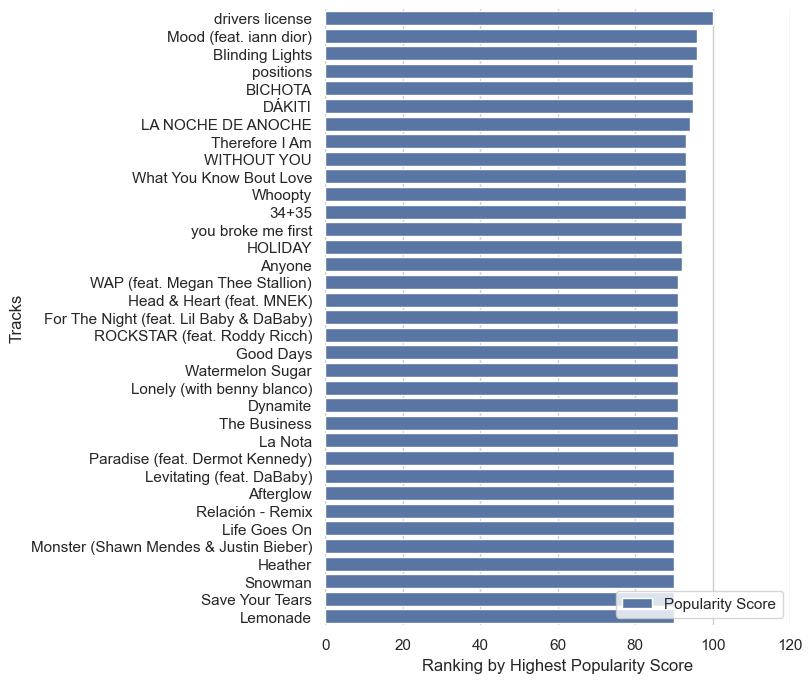

In [14]:
# Popularity ranking

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 8))

pop_rank = spotify_dataset.sort_values("popularity", ascending=False)
pop_rank.drop_duplicates(keep='first', inplace=True)
pop_rank = pop_rank.head(115)

sns.barplot(x='popularity', y="name",data=pop_rank,
            label="Popularity Score", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 120), ylabel="Tracks",
       xlabel="Ranking by Highest Popularity Score")
sns.despine(left=True, bottom=True)

plt.savefig("output1.jpg",dpi=300,bbox_inches='tight' )
plt.show()

# gives Top 35 ranked by popularity score

#### Correlation Analysis

In [15]:
df = spotify_dataset.iloc[:,5:16]
df

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,190779,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,174321,93,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,165819,86,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,173710,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,241106,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
...,...,...,...,...,...,...,...,...,...,...,...
1745,210893,44,0.629,0.00606,0.791,0.000000,0.1260,-4.308,0.1010,128.982,4
1746,217706,67,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1747,174806,58,0.642,0.93500,0.317,0.000000,0.2070,-9.325,0.1550,150.152,4
1748,180053,69,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4


In [16]:
# correaltion analysis

correlation = df.corr()

In [17]:
print(correlation['popularity'].sort_values(ascending=False))

popularity          1.000000
loudness            0.176528
danceability        0.097703
speechiness         0.040669
tempo               0.030692
length              0.029566
time_signature      0.028490
liveness            0.007742
energy             -0.011583
acousticness       -0.124462
instrumentalness   -0.252995
Name: popularity, dtype: float64


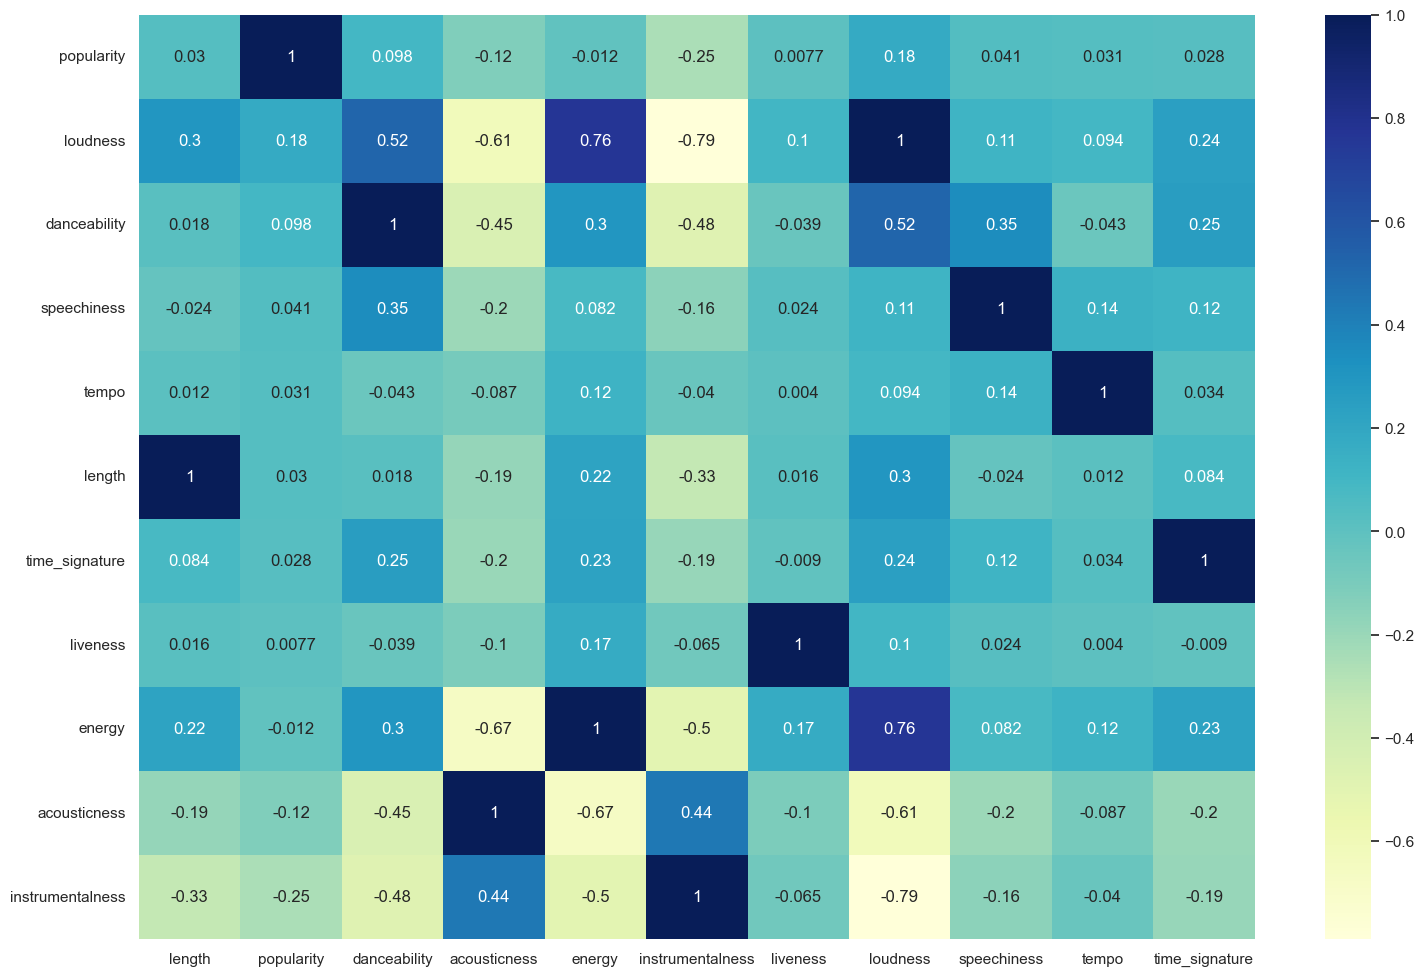

In [18]:
plt.figure(figsize=(18,12))
sns.heatmap(correlation.sort_values(by='popularity', ascending=False), annot=True, cmap="YlGnBu")
plt.savefig('corr_sorted.png',dpi=300)

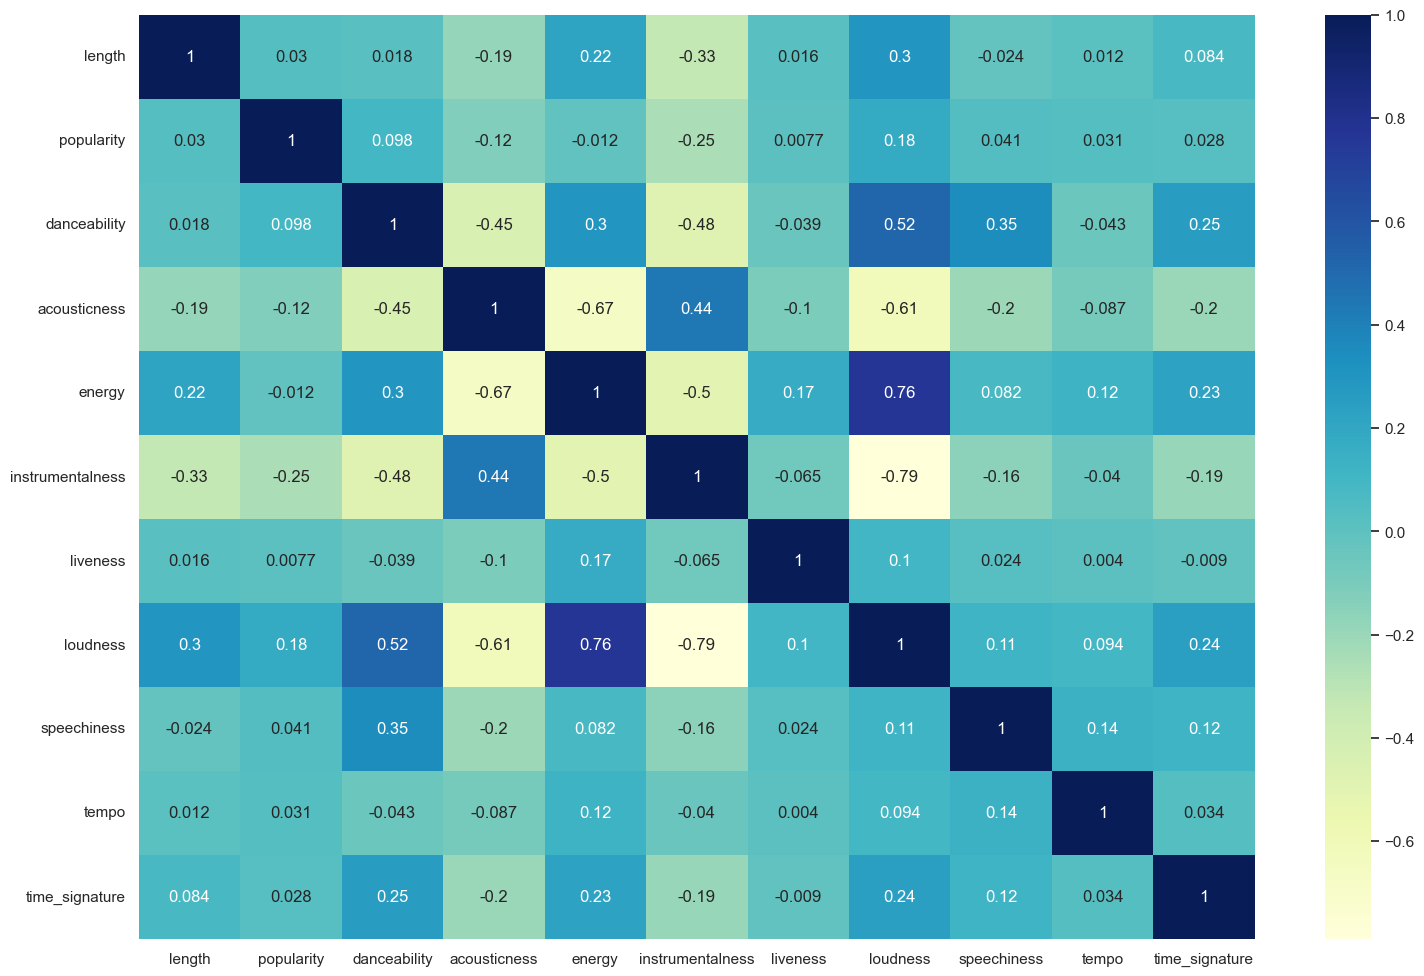

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.savefig('corr.png',dpi=300)

##### Histogram

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

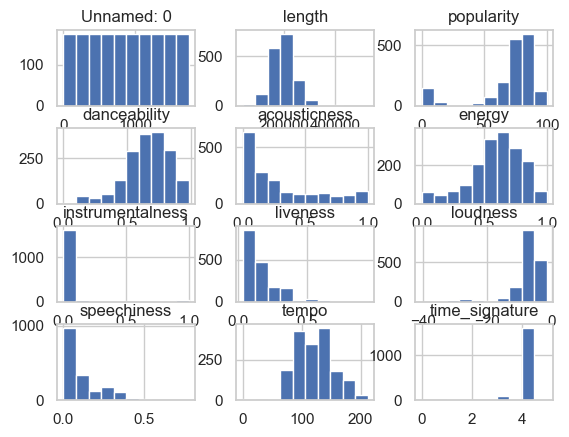

In [20]:
spotify_dataset.hist()

#### Scatter Plots

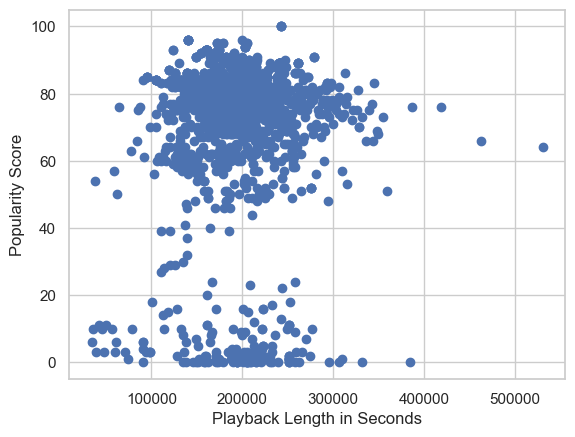

In [21]:
plt.scatter(spotify_dataset['length'], spotify_dataset['popularity'])
plt.ylabel("Popularity Score")
plt.xlabel("Playback Length in Seconds")
plt.show()

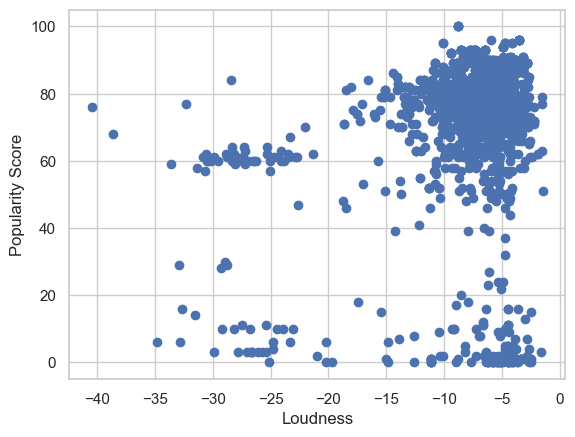

In [22]:
plt.scatter(spotify_dataset['loudness'],spotify_dataset['popularity'])
plt.ylabel("Popularity Score")
plt.xlabel("Loudness")
plt.show()

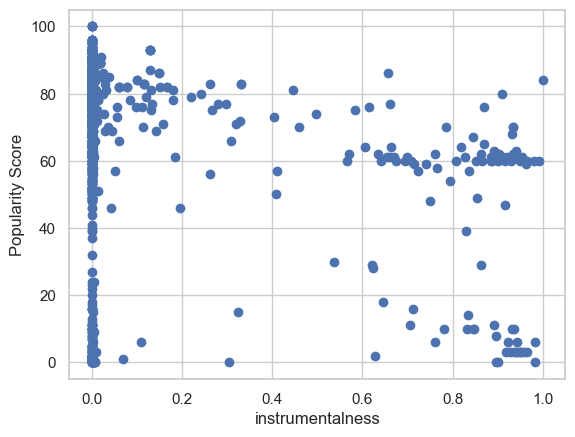

In [23]:
plt.scatter(spotify_dataset['instrumentalness'],spotify_dataset['popularity'])
plt.ylabel("Popularity Score")
plt.xlabel("instrumentalness")
plt.show()

### Classification

In [24]:
### KNN 

from sklearn.model_selection import train_test_split

X, y = df.drop(['popularity'], axis=1),df['popularity']

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_test_scaled,y_test)

0.26571428571428574

In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    
    "n_neighbors" : list(range(5,17,2)),
    "weights" : ["uniform","distance"]
    
}
knn = KNeighborsClassifier(n_jobs=4)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=4, n_iter=3,verbose =2,cv =3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/nikunjkonakalla/#UNI/Year 2/Sem 4/FODS/another/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=4), n_iter=3,
                   n_jobs=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [28]:
knn = clf.best_estimator_

In [29]:
knn.score(X_test_scaled, y_test)

0.4114285714285714

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=4)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=4)

In [31]:
forest.score(X_test_scaled, y_test)

0.4142857142857143